In [3]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

img = cv2.imread('/content/drive/MyDrive//pro/HaseImage01.jpg')
img2 = cv2.imread('/content/drive/MyDrive//pro/HaseImage02.jpg')
img3 = cv2.imread('/content/drive/MyDrive//pro/HaseImage03.jpg')
img4 = cv2.imread('/content/drive/MyDrive//pro/HaseImage04.jpg')
img5 = cv2.imread('/content/drive/MyDrive//pro/HaseImage05.jpg')


  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


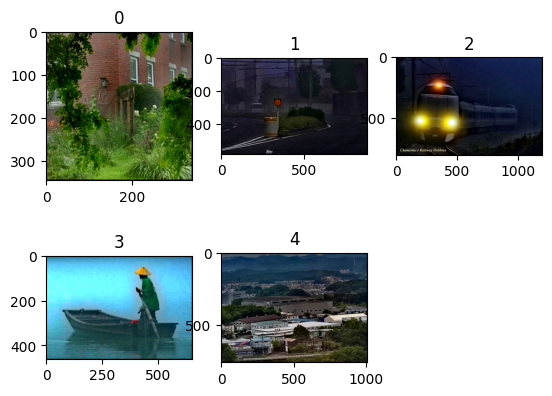

In [8]:
def hase_img(img,blur_prm,pacchi):
    # K'の画像作成
    height, width, channel = img.shape

    K_img = np.zeros((height, width), np.uint8)
    for y in range(0, height):
      for x in range(0, width):
        b = img[y,x,0]
        g = img[y,x,1]
        r = img[y,x,2]
        if ((b <= g) and (b <= r)):
          min = b
        elif ((g <= b) and (g <= r)):
          min = g
        elif ((r <= b) and (r <= g)):
          min = r
        K_img[y,x] = min

    # Aの値を求める。
    A = K_img.max()

    # L'の画像作成
     #パッチ数
    L_img = np.zeros((height,width),np.uint8)

    for y in range(0, height, pacchi):
      for x in range(0, width, pacchi):
        min = 255
        for h in range(pacchi):
          for w in range(pacchi):
            if ((y + h < height) and (x + w < width)):
              nums = K_img[y + h,x + w]
              if (min > nums):
                min = nums
        for i in range(pacchi):
          for j in range(pacchi):
            if ((y + i < height) and (x + j < width)):
              L_img[y + i, x + j] = min

    blur_img = cv2.GaussianBlur(L_img, (151,151),blur_prm)
    # ttを検出
    # Jを作成

    para = 0.95
    clear_img = np.zeros((height, width, channel), np.uint8)

    for y in range(0, height - 1):
      for x in range(0, width - 1):
        tt = 1 - (para * (blur_img[y,x]) / A)
        

        J_b = (img[y,x,0] - ((1 - tt)*A)) / tt
        if (J_b >= 255):
          J_b = 255
        if (J_b <= 0):
          J_b = 0

        J_g = (img[y,x,1] - ((1 - tt)*A)) / tt
        if (J_g >= 255):
          J_g = 255
        if (J_g <= 0):
          J_g = 0

        J_r = (img[y,x,2] - ((1 - tt)*A)) / tt
        if (J_r >= 255):
          J_r = 255
        if (J_r <= 0):
          J_r = 0
        clear_img[y,x,0] = J_b
        
        clear_img[y, x, 1] = J_g
        
        clear_img[y, x, 2] = J_r
    output_img = cv2.cvtColor(clear_img, cv2.COLOR_BGR2RGB)
    return output_img
#blurのパラメータと画像パッチ
result1 = hase_img(img,50,4)
result2 = hase_img(img2,40,8)
result3 = hase_img(img3,51,4)
result4 = hase_img(img4,20,10)
result5 = hase_img(img5,50,8)

fig = plt.figure()
results = [result1, result2, result3, result4, result5]

for i in range(5):
  fig.add_subplot(2, 3, i + 1).set_title(str(i))
  plt.imshow(results[i])

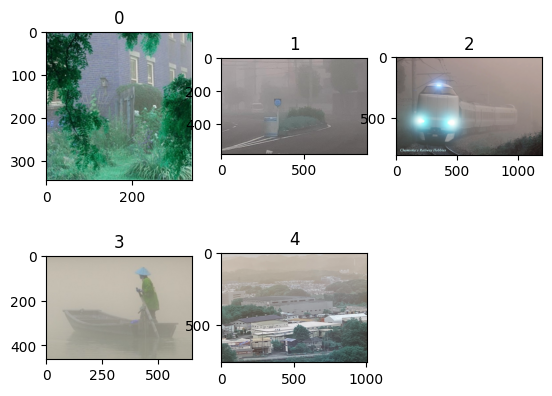

In [6]:
img_list=[img,img2,img3,img4,img5]
fig = plt.figure()
for i in range(5):
  fig.add_subplot(2, 3, i + 1).set_title(str(i))
  plt.imshow(img_list[i])